In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [2]:
# load dataset text processing
df = pd.read_csv('data/data-mentah.csv', usecols=["tweet_id", "latitude", "longitude", "country", "province", "city"])

# filter dataset yang mempunyai latitude dan longitude (tidak null atau empty)
df = df[df['latitude'].isnull() == False]
df = df[df['latitude'].isna() == False]

df = df[df['longitude'].isnull() == False]
df = df[df['longitude'].isna() == False]

# filter dataset yang country adalah indonesia
df = df[df['country'] == "Indonesia"]

df

,tweet_id,longitude,latitude,province,city,country
1,153857491925610496,106.797242,-6.596299,Jawa Barat,Kelurahan Pabaton,Indonesia
2,154361424154603520,117.890285,-2.483383,Kalimantan Timur,NaN,Indonesia
4,156936339718279168,117.890285,-2.483383,Kalimantan Timur,NaN,Indonesia
5,157281950728589312,117.890285,-2.483383,Kalimantan Timur,NaN,Indonesia
7,157810043499192320,106.988760,-6.240870,Jawa Barat,Bekasi,Indonesia
...,...,...,...,...,...,...
109695,1542492923153235968,110.412647,-6.980631,Jawa Tengah,Semarang,Indonesia
109696,1542499098506301440,107.040857,-6.200319,Jawa Barat,NaN,Indonesia
109697,1542505510510817287,106.827183,-6.175394,DKI Jakarta,Daerah Khusus Ibukota Jakarta,Indonesia
109703,1542592685978320896,119.666277,-9.593584,Nusa Tenggara Timur,NaN,Indonesia


In [3]:
# get list province yang ada di dalam dataset
provinces = df['province'].unique()
provinces

array(['Jawa Barat', 'Kalimantan Timur', 'DKI Jakarta', 'Papua Tengah',
       'Kalimantan Utara', 'Banten', 'Jawa Tengah',
       'Kepulauan Bangka Belitung', 'Sulawesi Tengah', 'Bali', 'Jambi',
       'Jawa Timur', 'Daerah Istimewa Yogyakarta', 'Papua Barat',
       'Kepulauan Riau', 'Sumatera Barat', 'Sumatera Selatan', 'Riau',
       'Kalimantan Selatan', 'Sumatera Utara', 'Kalimantan Tengah',
       'Sulawesi Selatan', 'Aceh', 'Nusa Tenggara Barat', 'Lampung',
       'Kalimantan Barat', 'Nusa Tenggara Timur', 'Sulawesi Utara',
       'Sulawesi Barat', 'Sulawesi Tenggara', 'Maluku', 'Gorontalo',
       'Maluku Utara', 'Bengkulu', 'Papua Pegunungan', 'Papua',
       'Papua Selatan'], dtype=object)

In [4]:
# buat dataframe baru untuk menyimpan province dan total data
column_names = ["province", "total"]
df_province = pd.DataFrame(columns = column_names)

# looping berdasarkan province 
for index, province in enumerate(provinces):
    temp = None
    
    # filter dataframe yang province sesuai dengan looping 
    # contoh DKI Jakarta
    temp = df[df['province'] == province] 

    # simpan data province ke dalam dataframe province
    # nama province - total
    df_province.loc[index+1] = [province, temp.shape[0]]


df_province = df_province.sort_values('total', ascending=False)
df_province

,province,total
3,DKI Jakarta,20823
2,Kalimantan Timur,12557
1,Jawa Barat,4695
12,Jawa Timur,2772
7,Jawa Tengah,1888
13,Daerah Istimewa Yogyakarta,1805
6,Banten,1294
20,Sumatera Utara,912
10,Bali,771
16,Sumatera Barat,553


In [5]:
# total semua data
df_province['total'].sum()

52590

In [6]:
# load json maps indonesia 
path = 'data/gadm36_IDN_1.json'
df_geo = gpd.read_file(path)

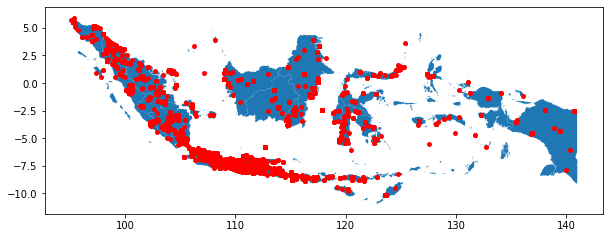

In [7]:
# ubah type data longitude dan latitude dari string menjadi float
df.longitude = df.longitude.astype(float)
df.latitude = df.latitude.astype(float)

# load geometry berdasarkan longitude dan latitude dataframe
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# combine data geometry dengan maps indonesia
gdf = GeoDataFrame(df, geometry=geometry)  

# munculkan gambarnya
gdf.plot(ax=df_geo.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);